In [2]:
#In this model we are going to analyse the IPL Auction of 2020 
#First import the neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Using pandas to read the file
#You would have to download the dataset
file = "IPL data.csv"
df = pd.read_csv(file)

In [4]:
#Show the first 5 rows
df.head()

,S.No,Set No,Set,Name,Country,Playing Role,IPL Matches,Capped / Uncapped /Associate,Reserve Price(in ₹ Lacs),IPL 2020 Team,Auctioned Price(in ₹ Lacs),IPL 2019 Team,IPL Team(s)
0,1,1,BA1,Chris Lynn,NaN,Batsman,41.0,Capped,200,Mumbai Indians,200,KKR,"Deccan Chargers,SRH,KKR"
1,2,1,BA1,Eoin Morgan,NaN,Batsman,52.0,Capped,200,Kolkata Knight Riders,525,NaN,"RCB, KKR, SRH, KXIP"
2,3,1,BA1,Robin Uthappa,NaN,Batsman,177.0,Capped,150,Rajasthan Royals,300,KKR,"MI, RCB, PWI, KKR"
3,4,1,BA1,Jason Roy,NaN,Batsman,8.0,Capped,150,Delhi Capitals,150,NaN,"GL,DD"
4,5,1,BA1,Aaron Finch,NaN,Batsman,75.0,Capped,100,Royal Challengers Bangalore,440,NaN,"RR, DD, PWI, SRH, MI, GL, KXIP"


In [5]:
df['IPL Matches'] = df['IPL Matches'].fillna(0)
df['IPL 2019 Team'] = df['IPL 2019 Team'].fillna("No Team")
df.head()

,S.No,Set No,Set,Name,Country,Playing Role,IPL Matches,Capped / Uncapped /Associate,Reserve Price(in ₹ Lacs),IPL 2020 Team,Auctioned Price(in ₹ Lacs),IPL 2019 Team,IPL Team(s)
0,1,1,BA1,Chris Lynn,NaN,Batsman,41.0,Capped,200,Mumbai Indians,200,KKR,"Deccan Chargers,SRH,KKR"
1,2,1,BA1,Eoin Morgan,NaN,Batsman,52.0,Capped,200,Kolkata Knight Riders,525,No Team,"RCB, KKR, SRH, KXIP"
2,3,1,BA1,Robin Uthappa,NaN,Batsman,177.0,Capped,150,Rajasthan Royals,300,KKR,"MI, RCB, PWI, KKR"
3,4,1,BA1,Jason Roy,NaN,Batsman,8.0,Capped,150,Delhi Capitals,150,No Team,"GL,DD"
4,5,1,BA1,Aaron Finch,NaN,Batsman,75.0,Capped,100,Royal Challengers Bangalore,440,No Team,"RR, DD, PWI, SRH, MI, GL, KXIP"


In [6]:
fs = df['Auctioned Price(in ₹ Lacs)'].sum()
print("₹{} Lacs were spent in the IPL Auction 2020".format(fs))

₹14030 Lacs were spent in the IPL Auction 2020


In [7]:
#A line to display the matplotlib in the notebook itself
%matplotlib inline
plt.rcParams['figure.figsize']=30,15

In [8]:
mylist = list(df['IPL 2020 Team'])
mylist = list(dict.fromkeys(mylist))
print(mylist)

['Mumbai Indians', 'Kolkata Knight Riders', 'Rajasthan Royals', 'Delhi Capitals', 'Royal Challengers Bangalore', 'Kings XI Punjab', 'Chennai Super Kings', 'Sunrisers Hyderabad']


In [9]:
#Calculating the difference between auctioned and reserved price
a = df['Auctioned Price(in ₹ Lacs)'] - df['Reserve Price(in ₹ Lacs)']
av = a.value_counts()
av.head()
print(a)

0       0
1     325
2     150
3       0
4     340
     ... 
57      0
58      0
59      0
60      0
61      0
Length: 62, dtype: int64


In [10]:
df['Increase from R to A'] = a
df.head()

,S.No,Set No,Set,Name,Country,Playing Role,IPL Matches,Capped / Uncapped /Associate,Reserve Price(in ₹ Lacs),IPL 2020 Team,Auctioned Price(in ₹ Lacs),IPL 2019 Team,IPL Team(s),Increase from R to A
0,1,1,BA1,Chris Lynn,NaN,Batsman,41.0,Capped,200,Mumbai Indians,200,KKR,"Deccan Chargers,SRH,KKR",0
1,2,1,BA1,Eoin Morgan,NaN,Batsman,52.0,Capped,200,Kolkata Knight Riders,525,No Team,"RCB, KKR, SRH, KXIP",325
2,3,1,BA1,Robin Uthappa,NaN,Batsman,177.0,Capped,150,Rajasthan Royals,300,KKR,"MI, RCB, PWI, KKR",150
3,4,1,BA1,Jason Roy,NaN,Batsman,8.0,Capped,150,Delhi Capitals,150,No Team,"GL,DD",0
4,5,1,BA1,Aaron Finch,NaN,Batsman,75.0,Capped,100,Royal Challengers Bangalore,440,No Team,"RR, DD, PWI, SRH, MI, GL, KXIP",340


Text(0.5, 1.0, 'Difference b/w Auctioned & Reserve Price vs number of players')

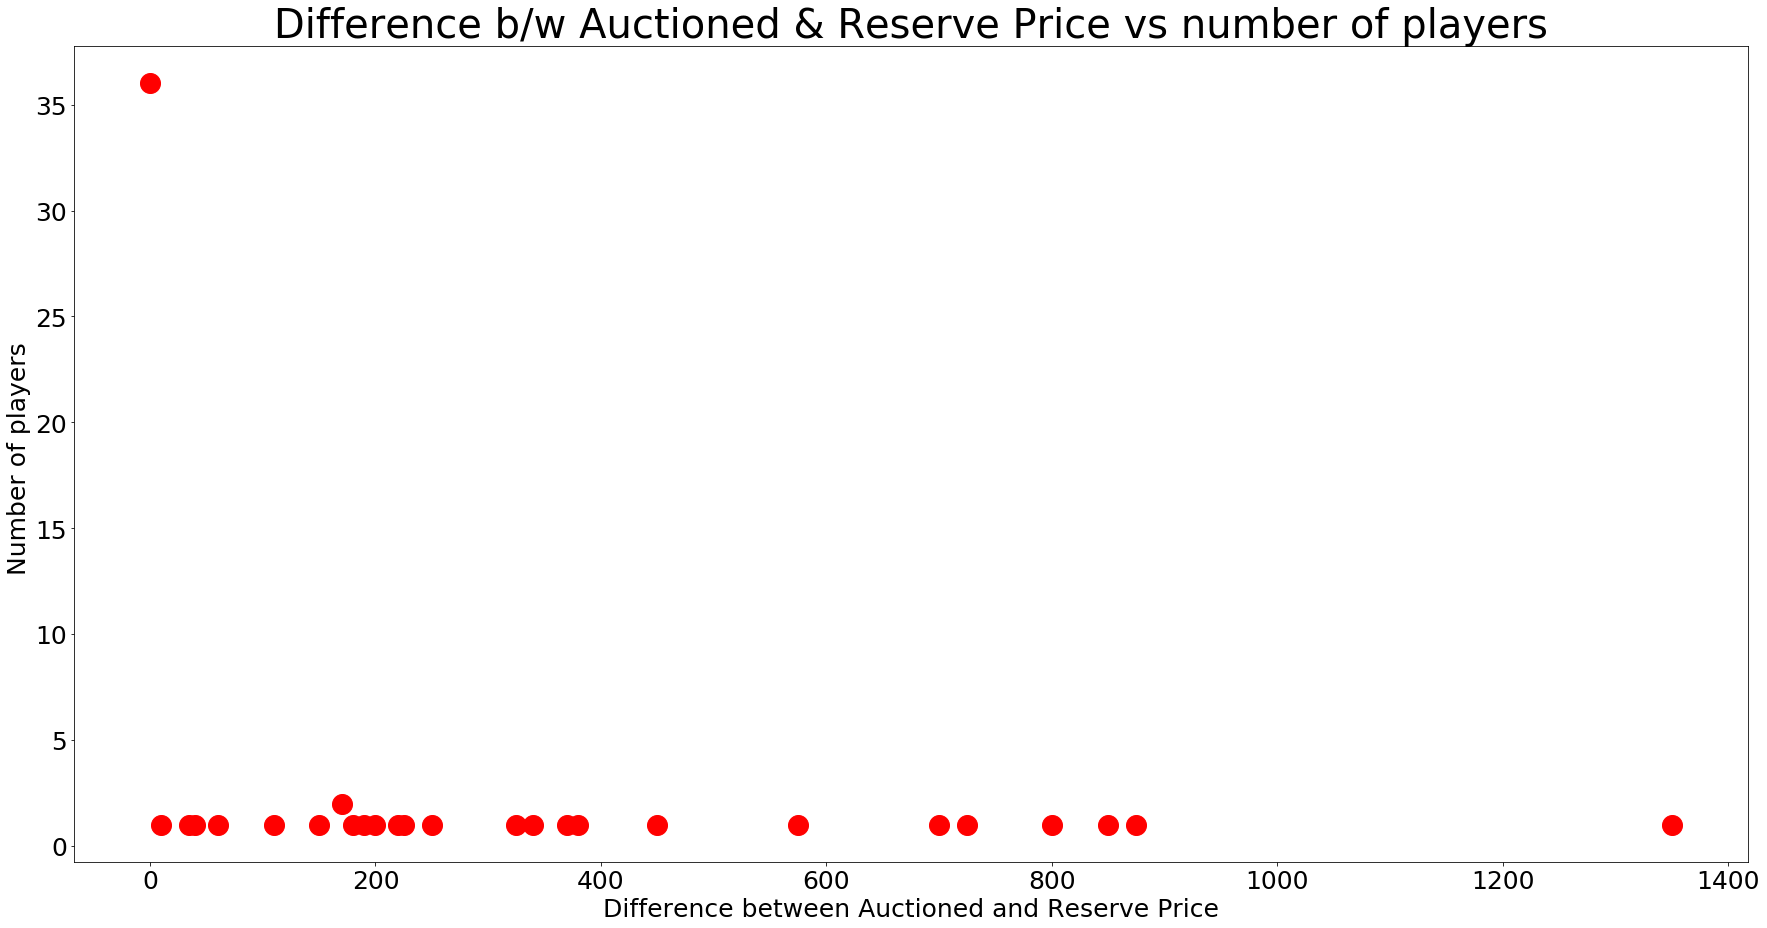

In [11]:
#36 Players were sold at their base price!!!
#Pretty insightful
#Let's plot it
#To plot it
plt.plot(av,c ='Red' , ls='', marker = 'o', ms=20)
#c - colour
# ls - line style
# marker - marker type
#ms - marker size

#The x-axis marks(ticks) - (0,200,400,600)
plt.xticks(fontsize = 25)
#The y-axis marks(ticks) - (0,5,10,15,20,25)
plt.yticks(fontsize = 25)
#The label of the y-axis
plt.ylabel("Number of players ",fontsize = 25)
#The label of the x-axis
plt.xlabel("Difference between Auctioned and Reserve Price",fontsize = 25)
#The title of the plot
plt.title("Difference b/w Auctioned & Reserve Price vs number of players",fontsize = 40)
#We will follow a similiar approcah for all the other plots

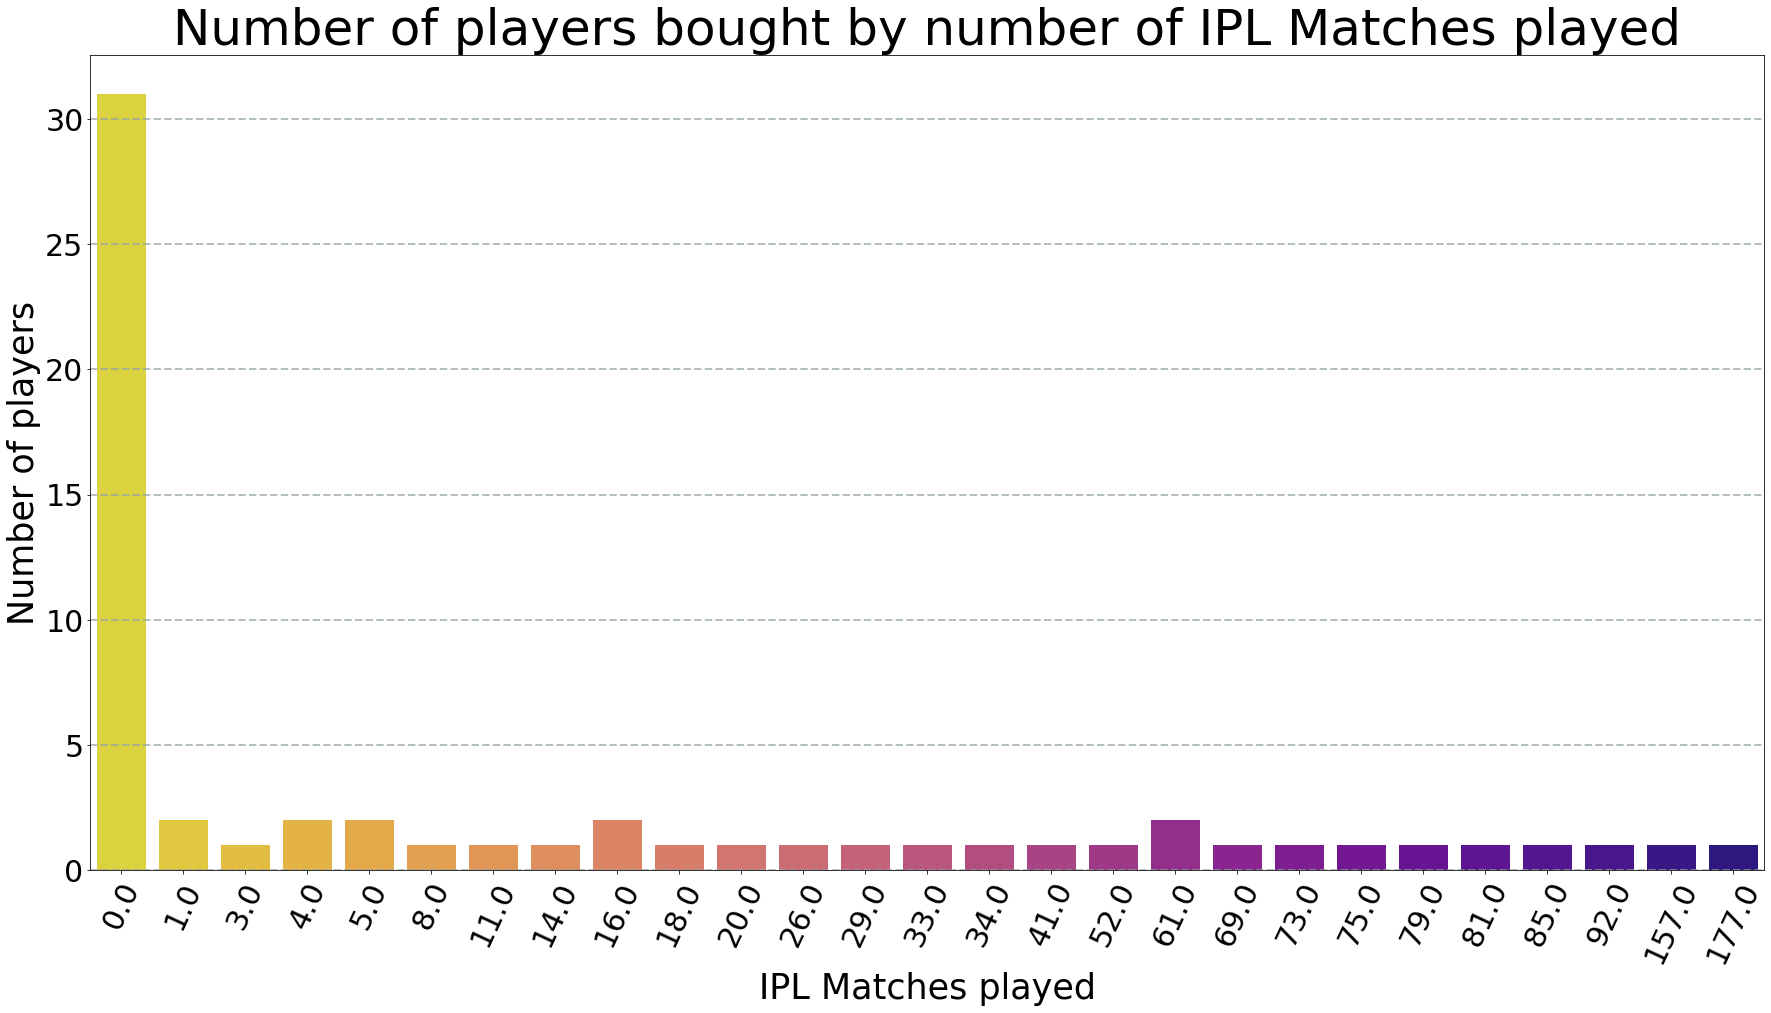

In [12]:
#Finding how many number of players bought based on number of IPL Matches played
sns.countplot(x = 'IPL Matches',data = df,
              palette = 'plasma_r',)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(fontsize = 30,rotation = 65)
plt.yticks(fontsize = 30)
plt.xlabel("IPL Matches played",fontsize = 35)
plt.ylabel("Number of players",fontsize = 35)
plt.title("Number of players bought by number of IPL Matches played",fontsize = 50)
plt.show()

Rajasthan Royals               11
Kolkata Knight Riders           9
Kings XI Punjab                 9
Royal Challengers Bangalore     8
Delhi Capitals                  8
Sunrisers Hyderabad             7
Mumbai Indians                  6
Chennai Super Kings             4
Name: IPL 2020 Team, dtype: int64


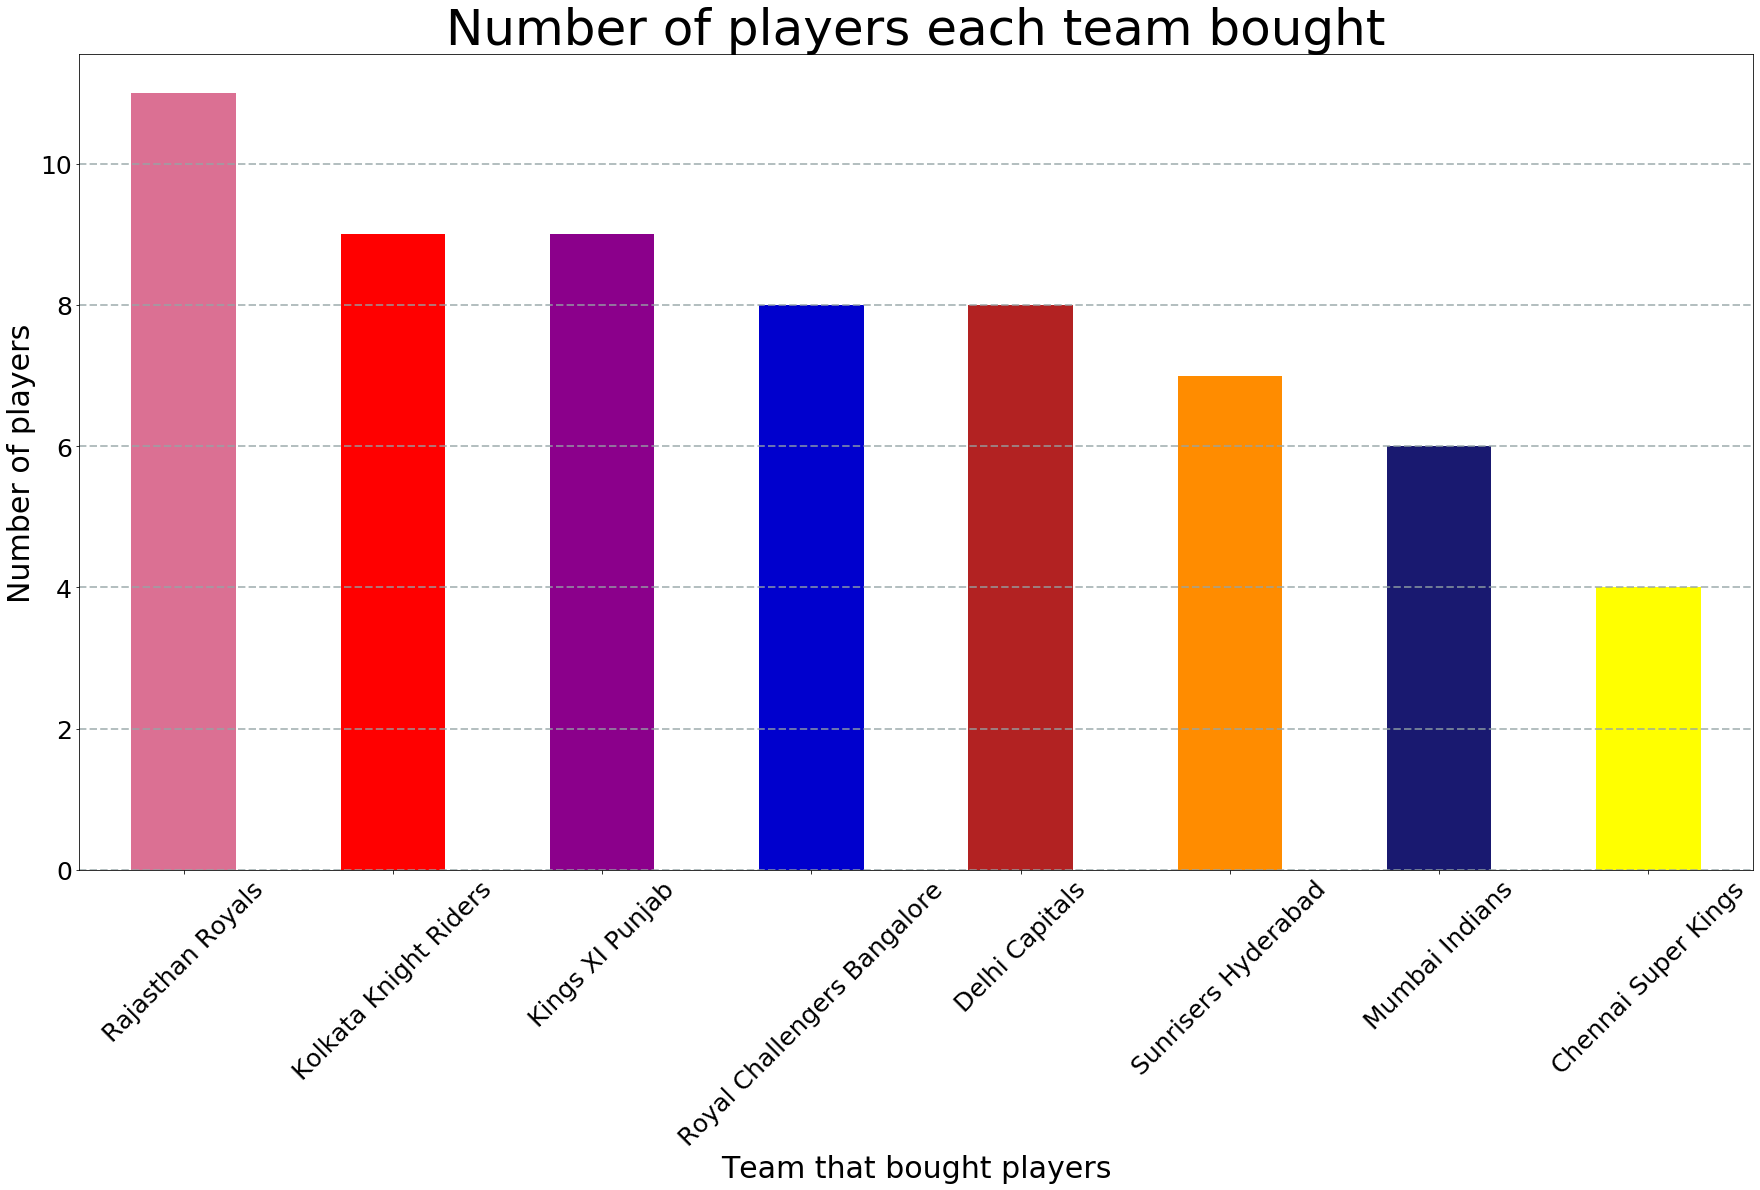

In [13]:
#Finding how many number of players each team bought
d = df['IPL 2020 Team']
dv = df['IPL 2020 Team'].value_counts()
print(dv)
dv.plot(kind = 'bar',color = ['palevioletred','red','darkmagenta','mediumblue','firebrick','darkorange','midnightblue','yellow'])
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(fontsize = 25,rotation = 45)
plt.yticks(fontsize = 25)
plt.xlabel("Team that bought players",fontsize = 30)
plt.ylabel("Number of players",fontsize = 30)
plt.title("Number of players each team bought",fontsize = 50)
plt.show()

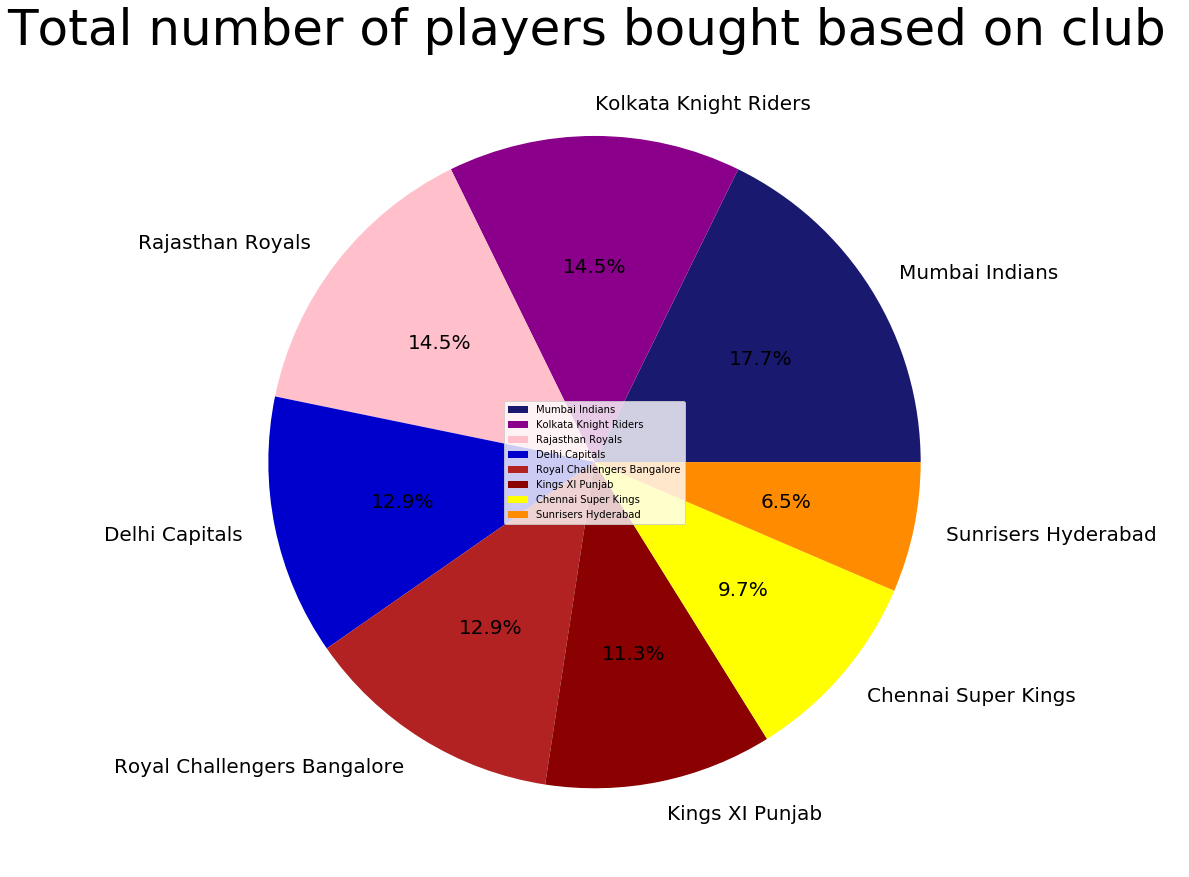

In [14]:
##Finding how many percent of total number of players each team bought in pie chart
plt.pie(dv,labels =mylist,
        colors = ['midnightblue','darkmagenta','pink','mediumblue',
                  'firebrick','darkred','yellow','darkorange'],
        autopct='%1.1f%%', textprops={'fontsize': 20})
plt.xticks(fontsize = 100)
plt.title("Total number of players bought based on club ",fontsize = 50)
plt.legend(loc = 'center')
plt.show()

No Team    45
RCB         4
KKR         4
KXIP        4
RR          3
SRH         1
DC          1
Name: IPL 2019 Team, dtype: int64


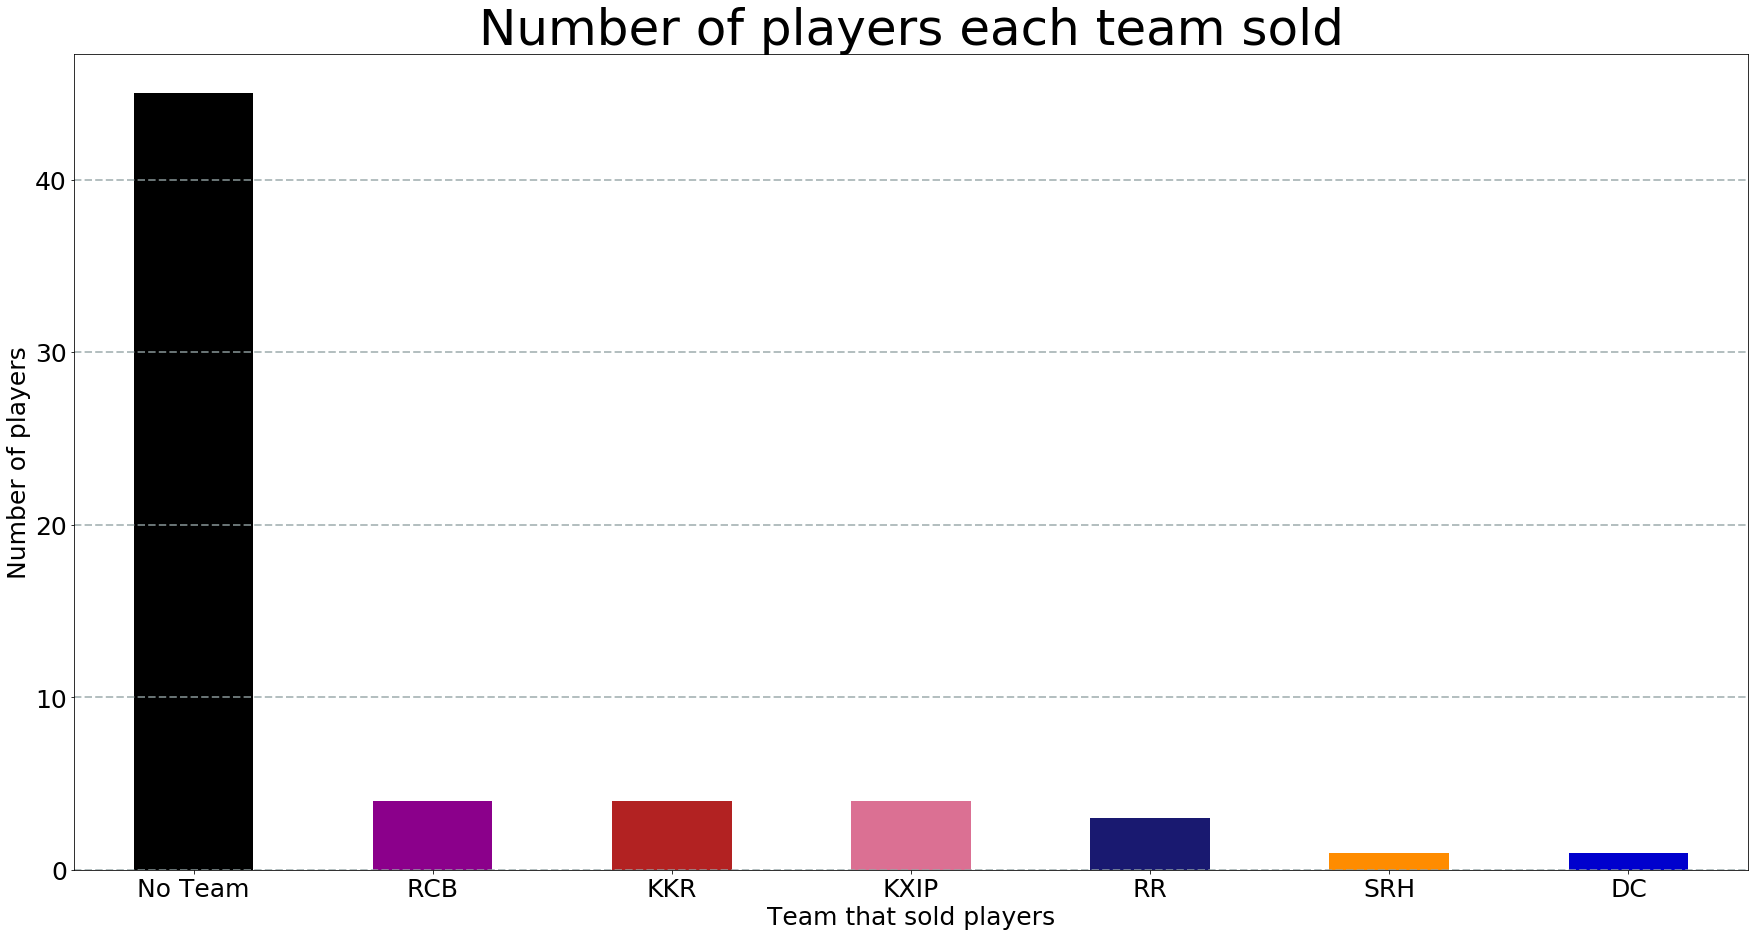

In [15]:
#Finding how many number of players each team sold
e = df['IPL 2019 Team'].value_counts()
print(e)
e.plot(kind = 'bar',color = ['black','darkmagenta','firebrick','palevioletred','midnightblue','darkorange','mediumblue'])
plt.xticks(fontsize = 25,rotation = 0)
plt.yticks(fontsize = 25)
plt.xlabel("Team that sold players",fontsize = 25)
plt.ylabel("Number of players",fontsize = 25)
plt.title("Number of players each team sold",fontsize = 50)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

Capped      32
Uncapped    30
Name: Capped / Uncapped /Associate, dtype: int64


Text(0.5, 1.0, 'Number of players capped and uncapped')

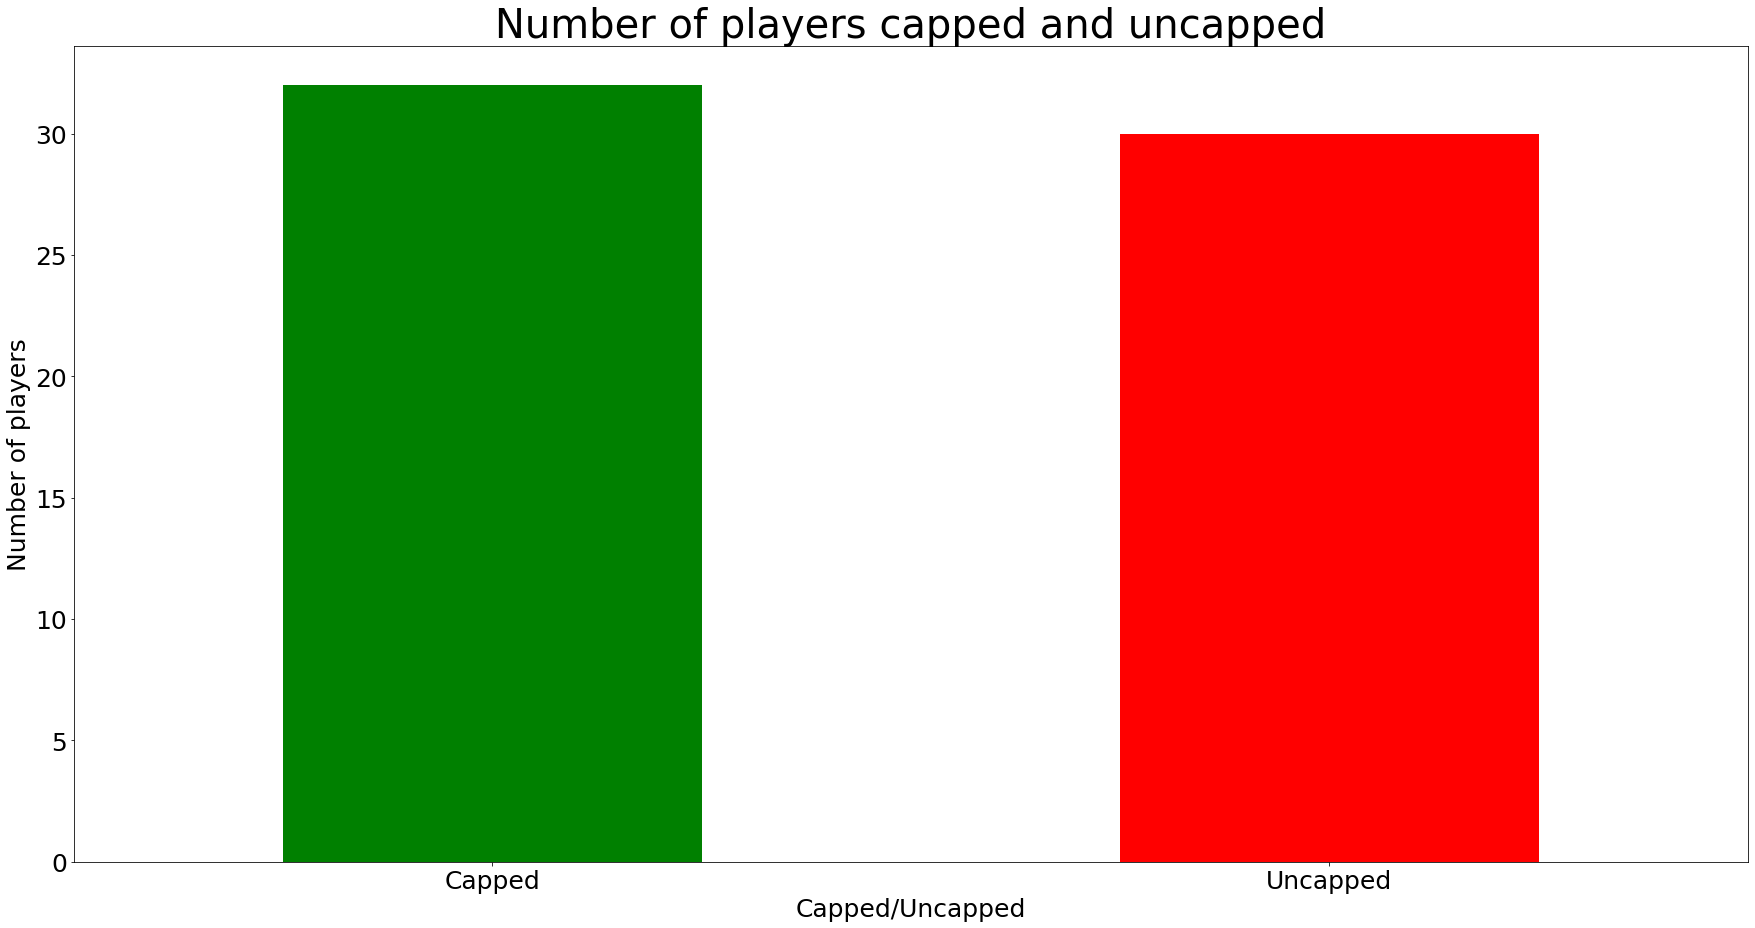

In [16]:
#Findind the correlation between number of players sold and capped/uncapped players
f = df['Capped / Uncapped /Associate'].value_counts()
print(f)
f.plot(kind = 'bar',color = ['green','red'])
plt.show
plt.xticks(fontsize =25,rotation = 0)
plt.yticks(fontsize = 25)
plt.xlabel("Capped/Uncapped",fontsize = 25)
plt.ylabel("Number of players",fontsize = 25)
plt.title("Number of players capped and uncapped",fontsize = 40)

All Rounder      26
Batsman          12
Fast Bowler       9
Wicket Keeper     6
Bowler            5
Spinner           4
Name: Playing Role, dtype: int64


Text(0.5, 1.0, 'Number of players based on playing role')

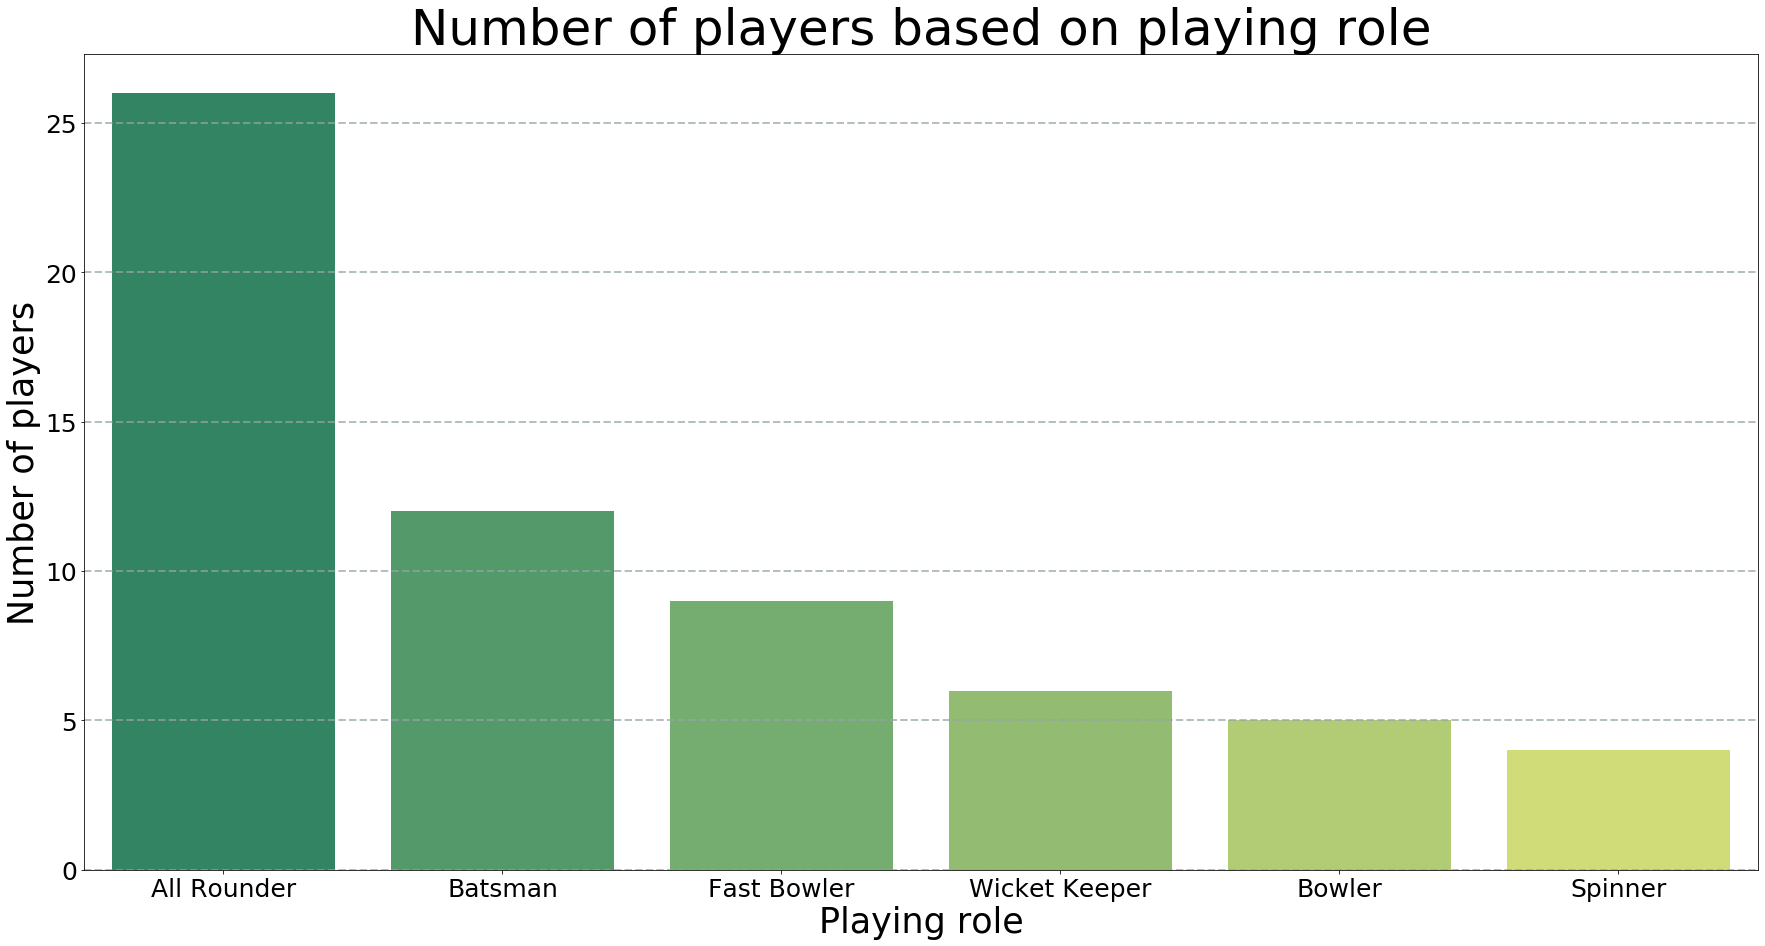

In [83]:
#Finding the correlation between playing role and number of players sold
g = df['Playing Role'].value_counts()
print(g)
sns.countplot(x = 'Playing Role',data = df,
              palette = 'summer',
             order = df['Playing Role'].value_counts().index)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(fontsize =25,rotation = 0)
plt.yticks(fontsize = 25)
plt.xlabel("Playing role",fontsize = 35)
plt.ylabel("Number of players",fontsize = 35)
plt.title("Number of players based on playing role",fontsize = 50)

['Batsman', 'All Rounder', 'Wicket Keeper', 'Fast Bowler', 'Spinner', 'Bowler']


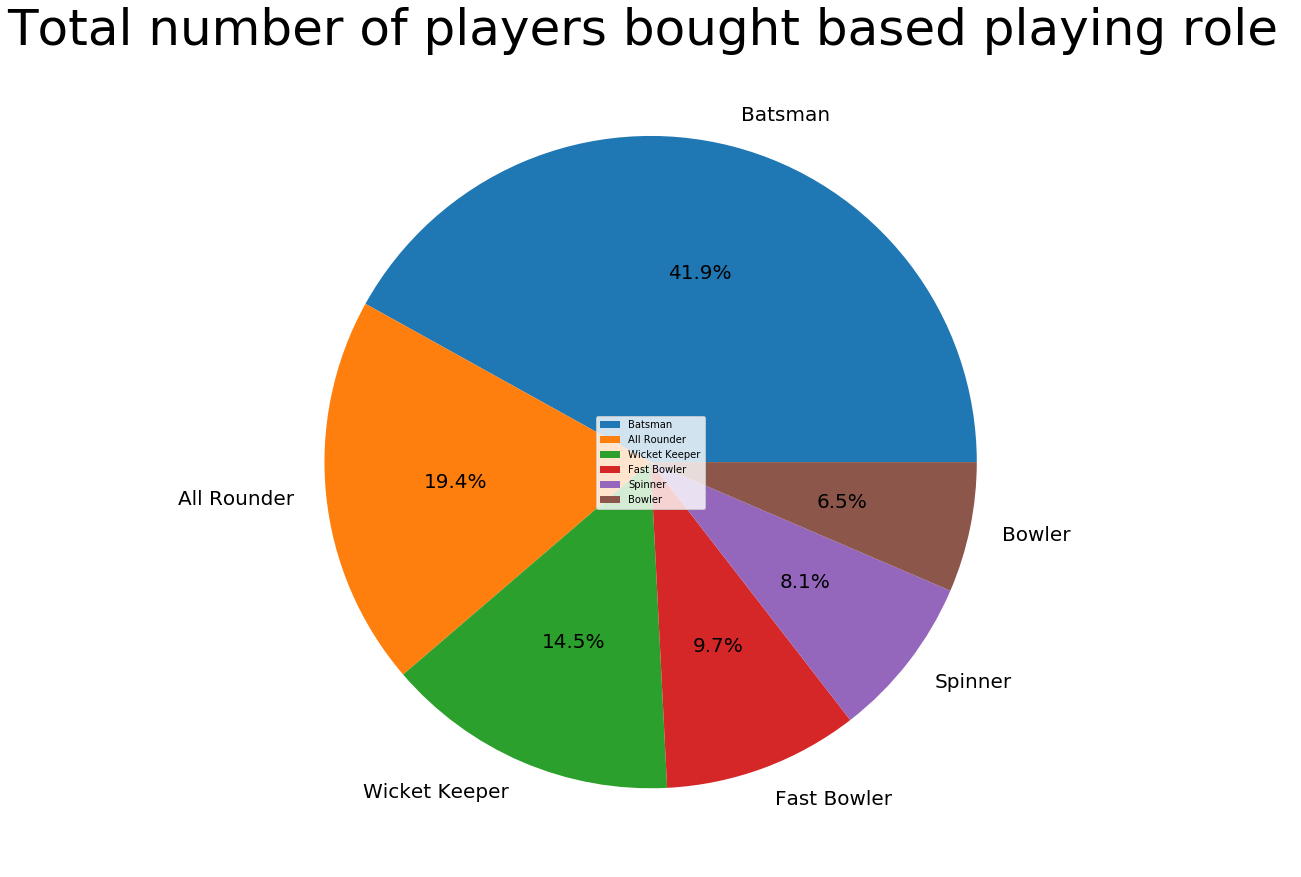

In [18]:
a = df['Playing Role']
a = list(dict.fromkeys(a))
print(a)

labels = df['Playing Role']
plt.pie(g, labels = a ,
        autopct='%1.1f%%', textprops={'fontsize': 20})
plt.xticks(fontsize = 100)
plt.title("Total number of players bought based playing role ",fontsize = 50)
plt.legend(loc = 'center')
plt.show()


Text(0.5, 1.0, 'Number of players in per price')

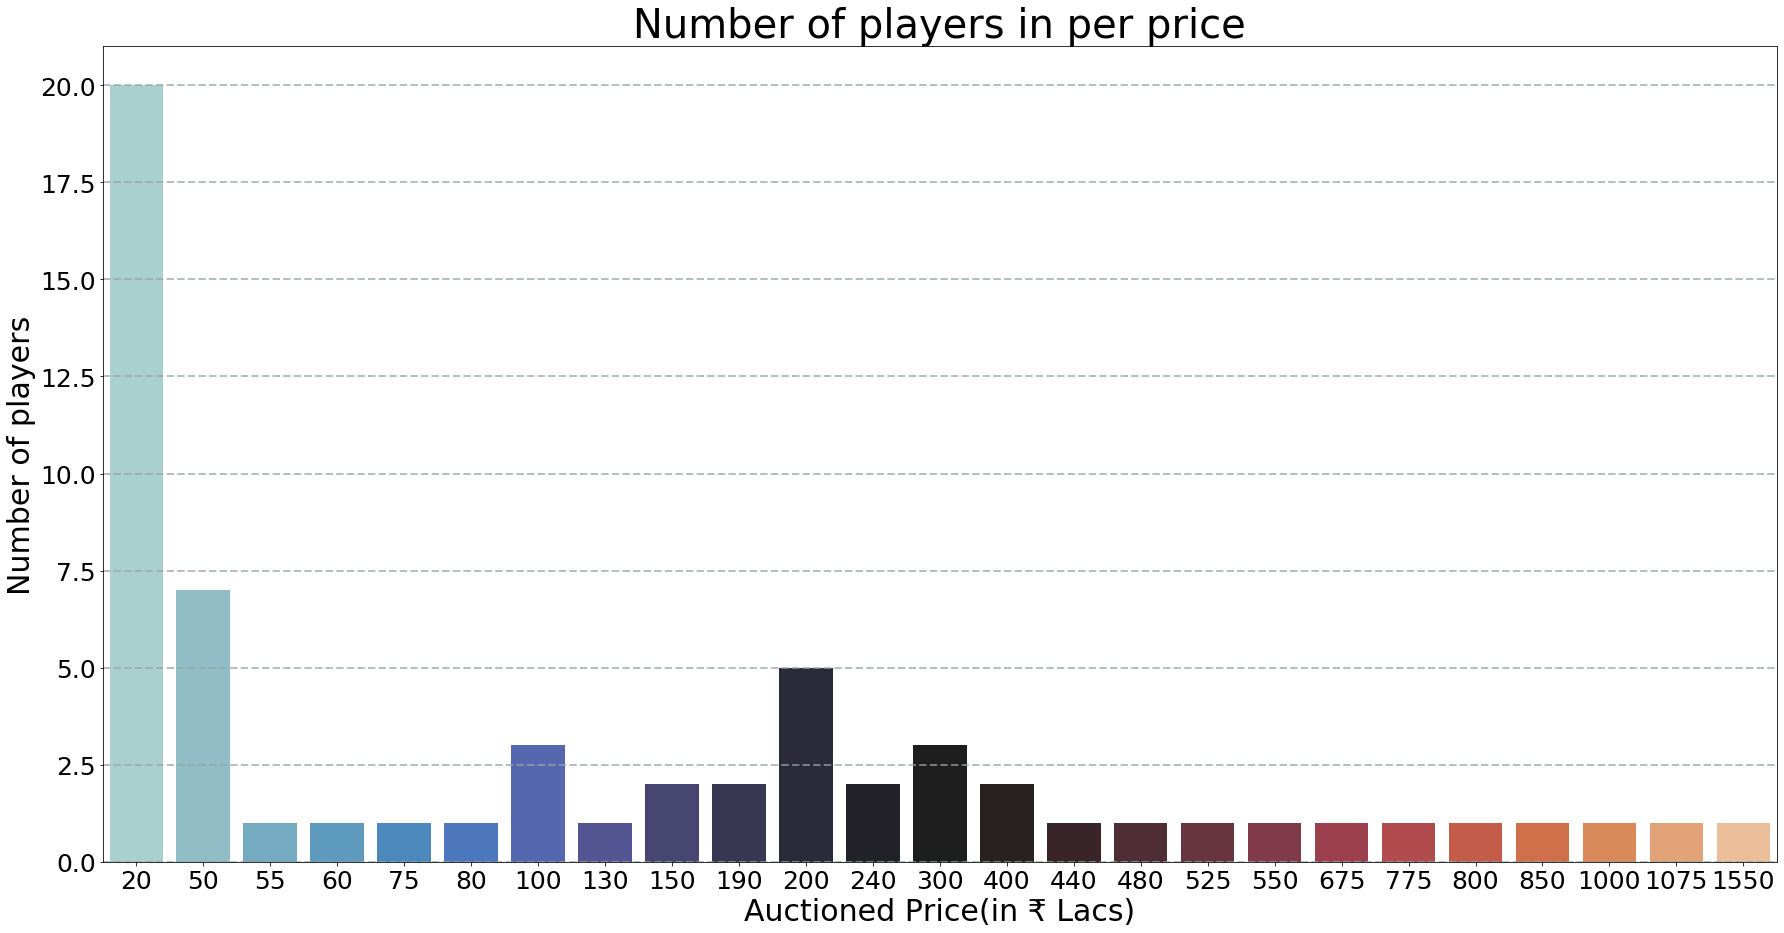

In [19]:
#Finding the correlation between auctioned and number of players sold
h = df['Auctioned Price(in ₹ Lacs)'].value_counts()
h.head()
sns.countplot(x = 'Auctioned Price(in ₹ Lacs)',data = df,
              palette = 'icefire',)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(fontsize =25)
plt.yticks(fontsize = 25)
plt.xlabel("Auctioned Price(in ₹ Lacs)",fontsize = 30)
plt.ylabel("Number of players",fontsize = 30)
plt.title("Number of players in per price",fontsize = 40)

20     28
50      9
100     9
200     7
150     5
75      2
40      1
30      1
Name: Reserve Price(in ₹ Lacs), dtype: int64


NameError: name 'tadf' is not defined

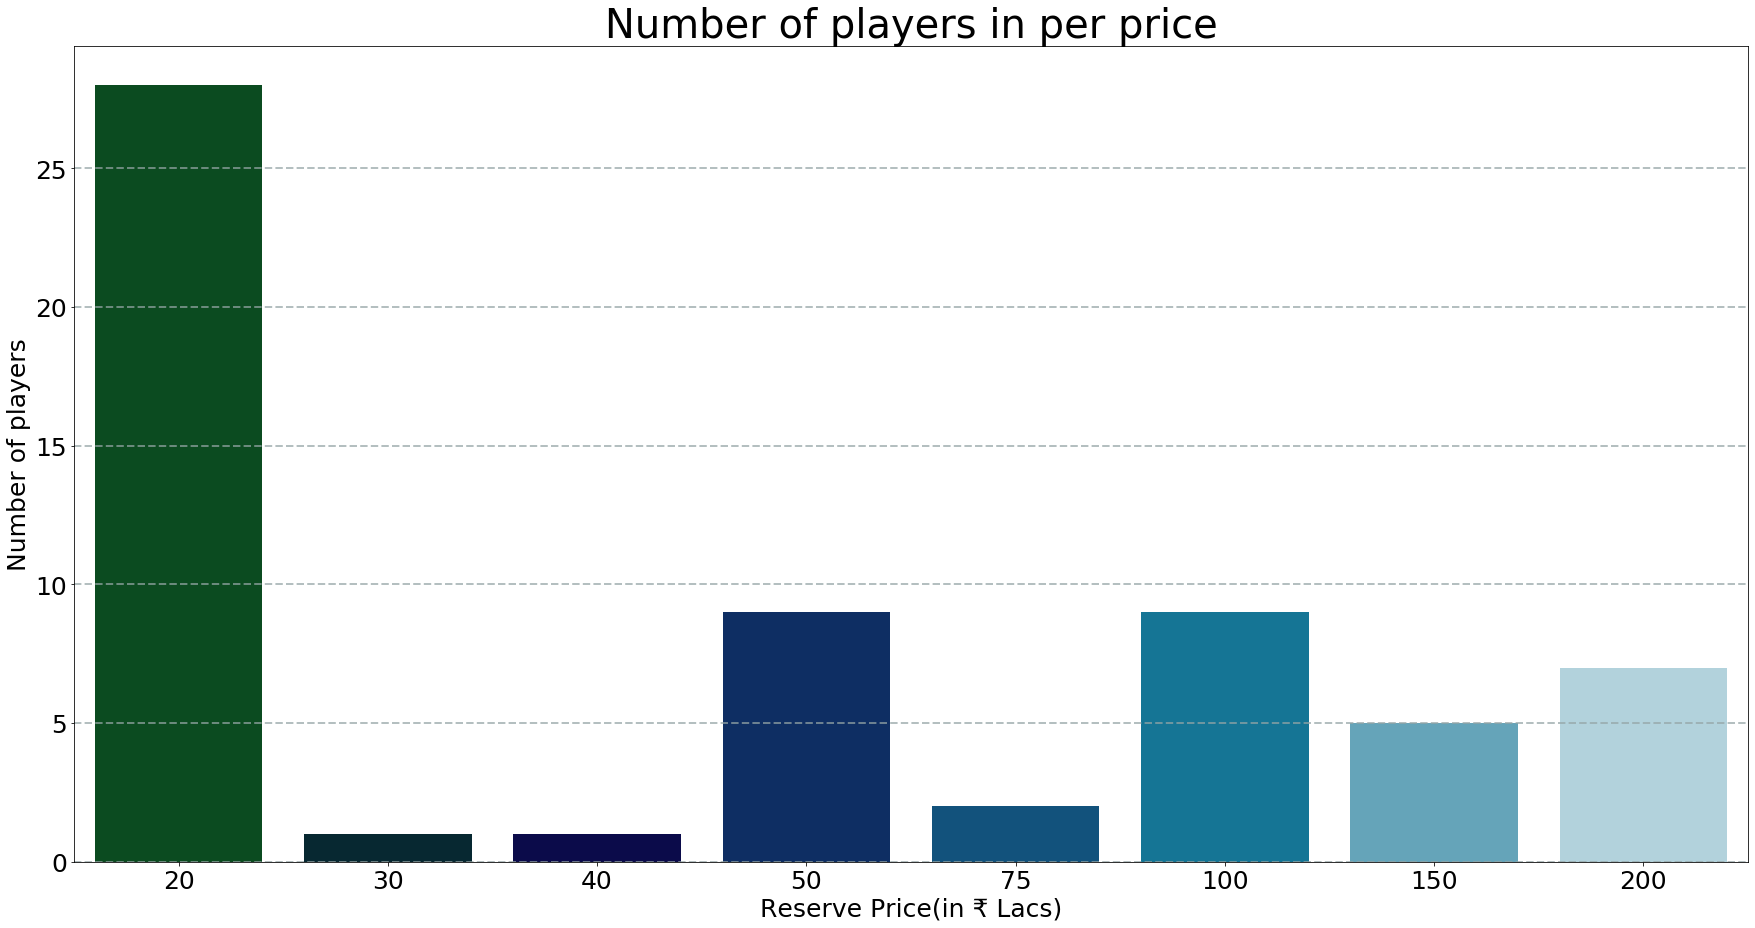

In [20]:
#Finding the correlation between reserved price and number of players sold
i = df['Reserve Price(in ₹ Lacs)'].value_counts()
print(i)
sns.countplot(x = 'Reserve Price(in ₹ Lacs)',data = df,
              palette = 'ocean',)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(fontsize =25)
plt.yticks(fontsize = 25)
plt.xlabel("Reserve Price(in ₹ Lacs)",fontsize = 25)
plt.ylabel("Number of players",fontsize = 25)
plt.title("Number of players in per price",fontsize = 40)
adf = df[df['Auctioned Price(in ₹ Lacs)']>=0].groupby(df['IPL 2020 Team']).sum()
adf = tadf[['Auctioned Price(in ₹ Lacs)']]
print(adf)

IPL 2020 Team
Chennai Super Kings            1445
Delhi Capitals                 1885
Kings XI Punjab                2620
Kolkata Knight Riders          2715
Mumbai Indians                 1110
Rajasthan Royals               1415
Royal Challengers Bangalore    2150
Sunrisers Hyderabad             690
Name: Auctioned Price(in ₹ Lacs), dtype: int64


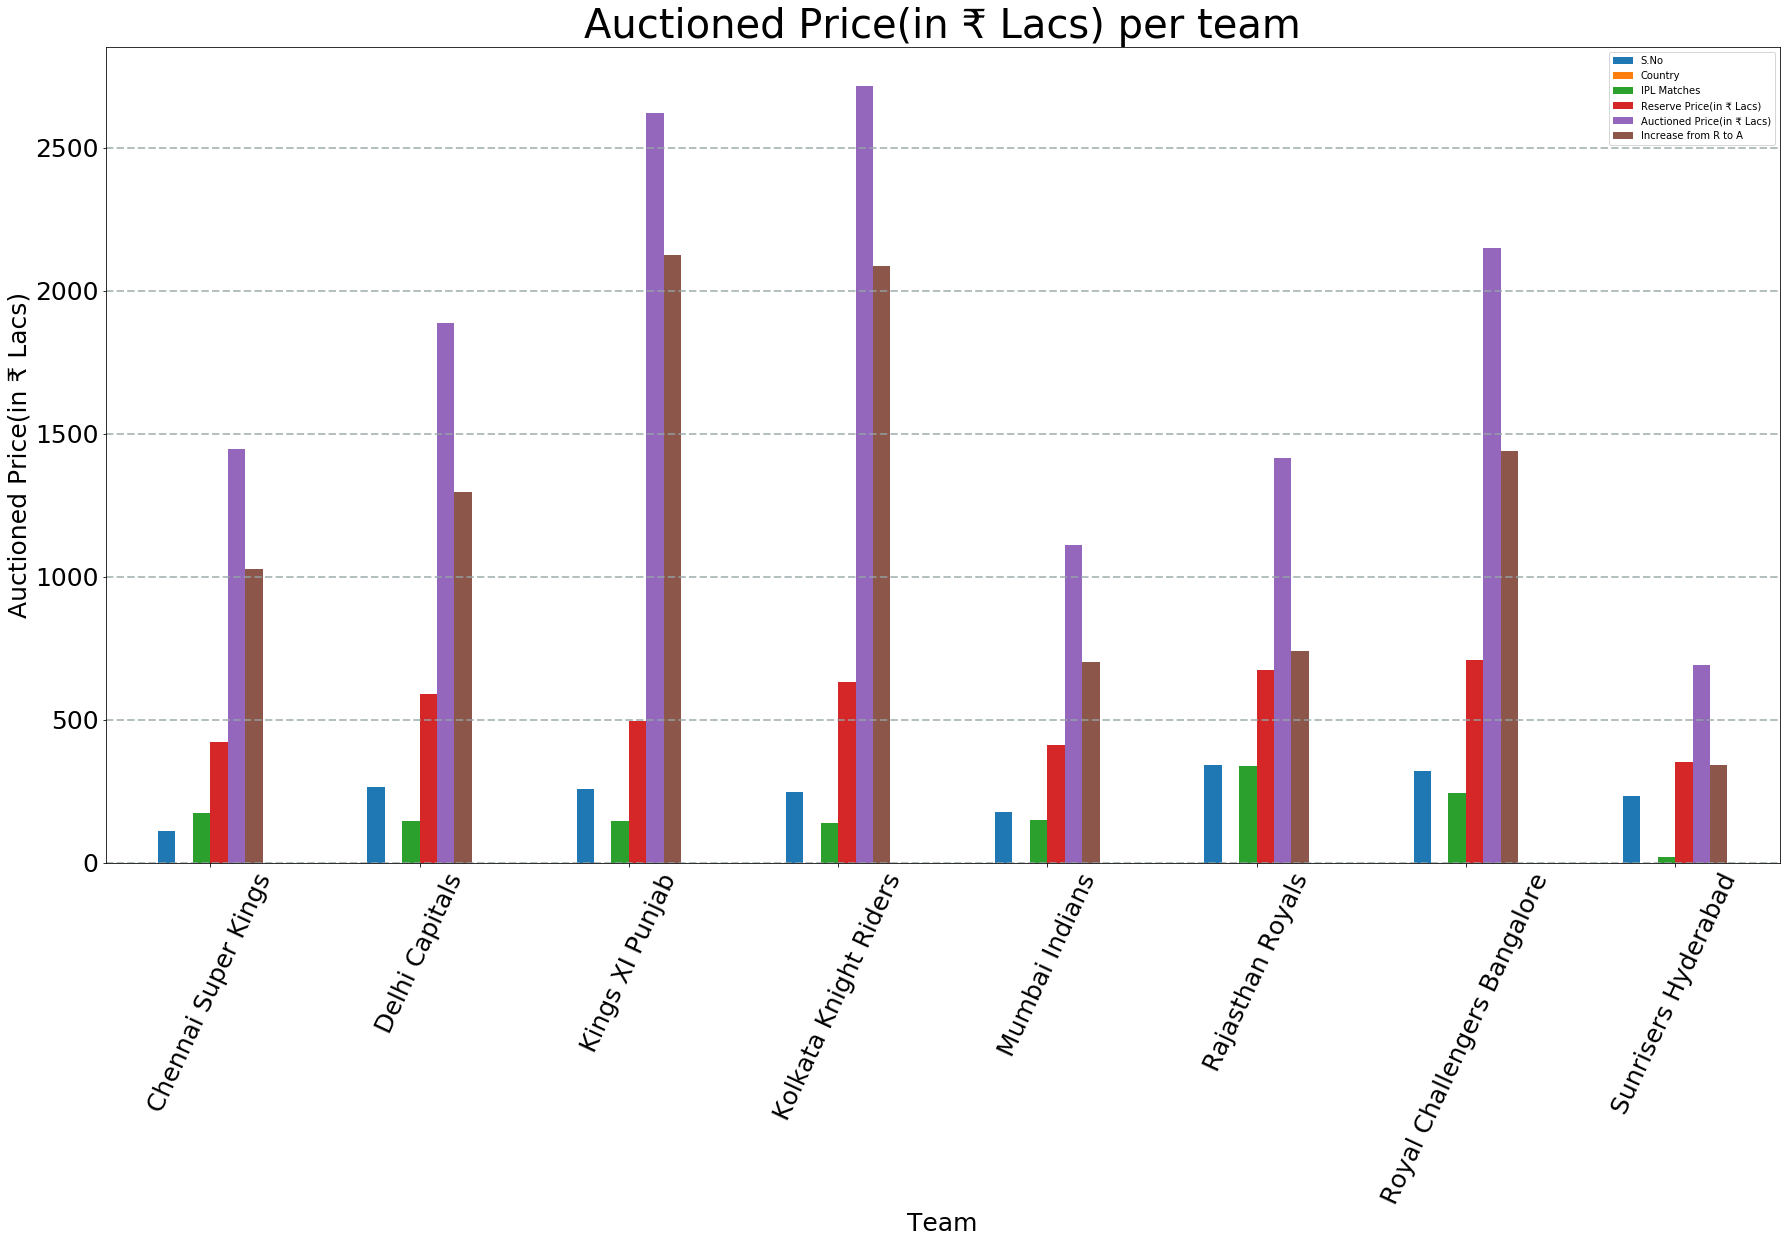

In [21]:
adf.plot(kind = 'bar')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(fontsize =25,rotation = 65)
plt.yticks(fontsize = 25)
plt.xlabel("Team",fontsize = 25,rotation = 0)
plt.ylabel("Auctioned Price(in ₹ Lacs)",fontsize = 25)
plt.title("Auctioned Price(in ₹ Lacs) per team",fontsize = 40)
print(adf['Auctioned Price(in ₹ Lacs)'])

In [22]:
tadf.plot(kind = 'bar')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(fontsize =25,rotation = 65)
plt.yticks(fontsize = 25)
plt.xlabel("Team",fontsize = 25,rotation = 0)
plt.ylabel("Reserve and Auctioned Price(in ₹ Lacs)",fontsize = 25)
plt.title("Reserve and Auctioned Price(in ₹ Lacs) per team",fontsize = 40)

NameError: name 'tadf' is not defined

In [ ]:
tadf = df[df['Auctioned Price(in ₹ Lacs)']>=0].groupby(df['IPL 2020 Team']).sum()
tadf = tadf[['Reserve Price(in ₹ Lacs)','Auctioned Price(in ₹ Lacs)']]
tap = tadf['Auctioned Price(in ₹ Lacs)']
tadf

In [ ]:
tadf['Auctioned Price(in ₹ Lacs)'].sum()

In [ ]:
labels = df['IPL 2020 Team']
plt.pie(tap, labels = mylist,
        colors = ['midnightblue','darkmagenta','pink','mediumblue',
                  'firebrick','darkred','yellow','darkorange',],
        autopct='%1.1f%%', textprops={'fontsize': 20})
plt.xticks(fontsize = 100)
plt.title("Total value of purchase based on club bought",fontsize = 50)
plt.legend(loc = 'center')
plt.show()

In [ ]:
tap 

In [ ]:
mylist = list(df['IPL 2020 Team'])
mylist = list(dict.fromkeys(mylist))
print(mylist)

In [ ]:
padf = df[df['Auctioned Price(in ₹ Lacs)']>=0].groupby(df['Playing Role']).sum()
padf = padf[['Reserve Price(in ₹ Lacs)','Auctioned Price(in ₹ Lacs)']]
pap = padf['Auctioned Price(in ₹ Lacs)']
padf

In [ ]:
p = list(df['Playing Role'])
p = list(dict.fromkeys(p))
p

In [ ]:
plt.pie(pap, labels = p ,autopct='%1.1f%%', textprops={'fontsize': 20})
plt.xticks(fontsize = 50)
plt.title("Total value of purchase based on club bought",fontsize = 50)
plt.legend(loc = 'center')
plt.show()

In [ ]:
c = list(df['Capped / Uncapped /Associate'])
c = list(dict.fromkeys(c))
c

In [ ]:
pytdf = df[df['Auctioned Price(in ₹ Lacs)']>=0].groupby(df['Capped / Uncapped /Associate']).sum()
pytdf = pytdf[['Reserve Price(in ₹ Lacs)','Auctioned Price(in ₹ Lacs)']]
pyt = pytdf['Auctioned Price(in ₹ Lacs)']
plt.pie(pyt, labels = c ,autopct='%1.1f%%', textprops={'fontsize': 25})
plt.xticks(fontsize = 50)
plt.title("Total value of purchase based on capped or uncapped",fontsize = 50)
plt.legend(loc = 'center')
plt.show()

In [23]:
pytdf

NameError: name 'pytdf' is not defined

In [24]:
iplmdf = df[df['Auctioned Price(in ₹ Lacs)']>=0].groupby(df['IPL Matches']).sum()
iplmdf = iplmdf[['Reserve Price(in ₹ Lacs)','Auctioned Price(in ₹ Lacs)']]
iplmdf

,Reserve Price(in ₹ Lacs),Auctioned Price(in ₹ Lacs)
IPL Matches,,
0.0,1080,2980
1.0,50,455
3.0,20,20
4.0,100,100
5.0,150,875
8.0,150,150
11.0,75,300
14.0,150,400
16.0,300,2100


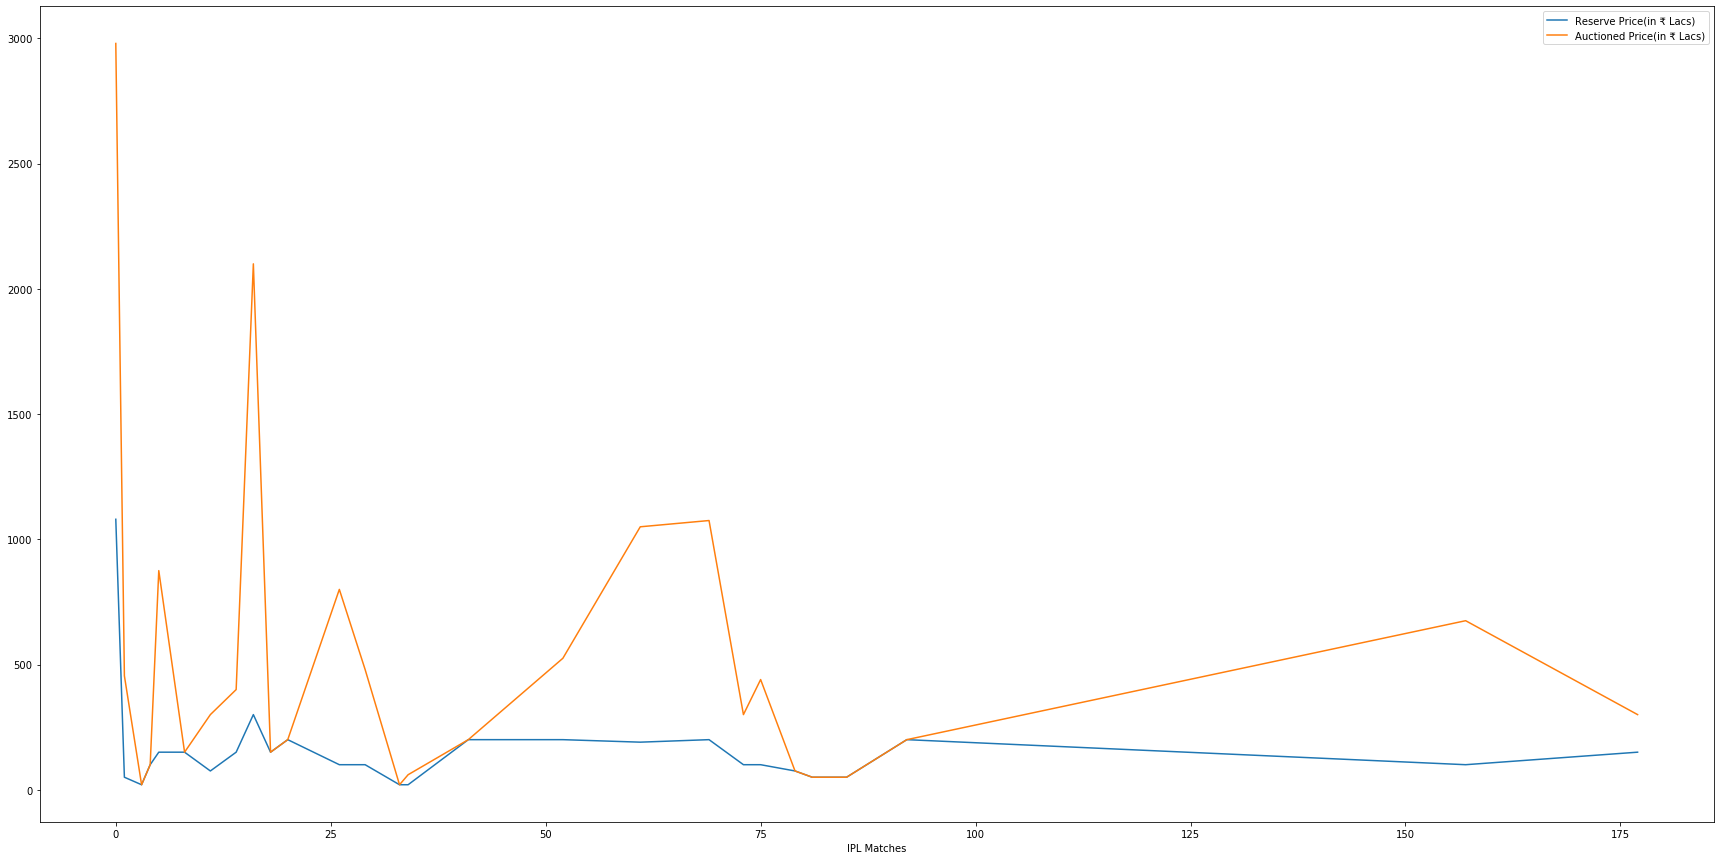

In [25]:
iplmdf.plot()

In [26]:
padf['Playing Role'] = df['Playing Role']
del padf['Playing Role']
padf

NameError: name 'padf' is not defined

In [ ]:
    pap

In [ ]:
tadf['Auctioned Price(in ₹ Lacs)'].plot(kind = 'bar',color = ['yellow','mediumblue','red','darkmagenta','midnightblue',
                              'palevioletred','firebrick','darkorange'])
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(fontsize = 30,rotation = 60)
plt.yticks(fontsize = 30)
plt.xlabel("IPL Team ",fontsize = 40)
plt.ylabel("Amount of ₹ lakhs spent ",fontsize = 40)
plt.title("Amount of ₹ lakhs spent by each team ",fontsize = 60)
plt.show()

In [ ]:
df['IPL 2020 Team'].value_counts()

In [ ]:
tap

In [27]:
tadf

NameError: name 'tadf' is not defined

In [28]:
del tadf['Reserve Price(in ₹ Lacs)']

NameError: name 'tadf' is not defined

In [29]:
tadf['No. of Players'] = dv

NameError: name 'tadf' is not defined

In [30]:
tadf

NameError: name 'tadf' is not defined

In [34]:
tadf.to_csv('IPL Teams purchases')

NameError: name 'tadf' is not defined

In [32]:
ardf = df[df['Playing Role']=='All Rounder']

In [33]:
ardf

,S.No,Set No,Set,Name,Country,Playing Role,IPL Matches,Capped / Uncapped /Associate,Reserve Price(in ₹ Lacs),IPL 2020 Team,Auctioned Price(in ₹ Lacs),IPL 2019 Team,IPL Team(s),Increase from R to A
5,6,2,AL1,Glenn Maxwell,NaN,All Rounder,69.0,Capped,200,Kings XI Punjab,1075,No Team,"MI,KXIP,DD",875
6,7,2,AL1,Chris Woakes,NaN,All Rounder,18.0,Capped,150,Delhi Capitals,150,No Team,"KKR,RCB",0
7,8,2,AL1,Pat Cummins,NaN,All Rounder,16.0,Capped,200,Kolkata Knight Riders,1550,No Team,"MI,KKR,DD",1350
8,9,2,AL1,Sam Curran,NaN,All Rounder,16.0,Capped,100,Chennai Super Kings,550,KXIP,KXIP,450
9,10,2,AL1,Chris Morris,NaN,All Rounder,61.0,Capped,150,Royal Challengers Bangalore,1000,DC,"CSK,RR,DC",850
12,13,4,FA1,Nathan Coulter-Nile,NaN,All Rounder,26.0,Capped,100,Mumbai Indians,800,RCB,"MI, DD, KKR, RCB",700
18,19,7,UAL1,Deepak Hooda,NaN,All Rounder,61.0,Uncapped,40,Kings XI Punjab,50,SRH,"RR,SRH",10
19,20,7,UAL1,Varun Chakravarthy,NaN,All Rounder,1.0,Uncapped,30,Kolkata Knight Riders,400,KXIP,KXIP,370
20,21,7,UAL1,Yashasvi Jaiswal,NaN,All Rounder,0.0,Uncapped,20,Rajasthan Royals,240,No Team,NaN,220
30,31,12,AL2,Mitchell Marsh,NaN,All Rounder,20.0,Capped,200,Sunrisers Hyderabad,200,No Team,"DCH,PWI,RPS",0


In [35]:
ardf['Auctioned Price(in ₹ Lacs)'].value_counts()

20      10
50       4
480      1
150      1
1075     1
400      1
240      1
1550     1
300      1
1000     1
550      1
100      1
200      1
800      1
Name: Auctioned Price(in ₹ Lacs), dtype: int64

In [36]:
ardf['IPL 2020 Team'].value_counts()


Sunrisers Hyderabad            5
Kings XI Punjab                5
Kolkata Knight Riders          3
Rajasthan Royals               3
Royal Challengers Bangalore    3
Delhi Capitals                 3
Mumbai Indians                 3
Chennai Super Kings            1
Name: IPL 2020 Team, dtype: int64

In [37]:
ardf['IPL Matches'].value_counts()

0.0     13
61.0     2
16.0     2
5.0      1
29.0     1
11.0     1
4.0      1
20.0     1
1.0      1
26.0     1
18.0     1
69.0     1
Name: IPL Matches, dtype: int64

In [38]:
ardf['Auctioned Price(in ₹ Lacs)'].max()

1550

In [39]:
ardf['Auctioned Price(in ₹ Lacs)'].min()

20

In [51]:
aradf = df[df['Auctioned Price(in ₹ Lacs)']>=0].groupby(df['Playing Role']).sum()

In [55]:
aradf['Number of players'] = g

In [56]:
aradf

,S.No,Country,IPL Matches,Reserve Price(in ₹ Lacs),Auctioned Price(in ₹ Lacs),Increase from R to A,Number of players
Playing Role,,,,,,,
All Rounder,890,0.0,337.0,1815,7245,5430,26
Batsman,191,0.0,552.0,1135,3055,1920,12
Bowler,270,0.0,177.0,390,390,0,5
Fast Bowler,251,0.0,91.0,630,1990,1360,9
Spinner,111,0.0,190.0,160,915,755,4
Wicket Keeper,240,0.0,4.0,150,435,285,6


Playing Role
All Rounder      7245
Batsman          3055
Bowler            390
Fast Bowler      1990
Spinner           915
Wicket Keeper     435
Name: Auctioned Price(in ₹ Lacs), dtype: int64


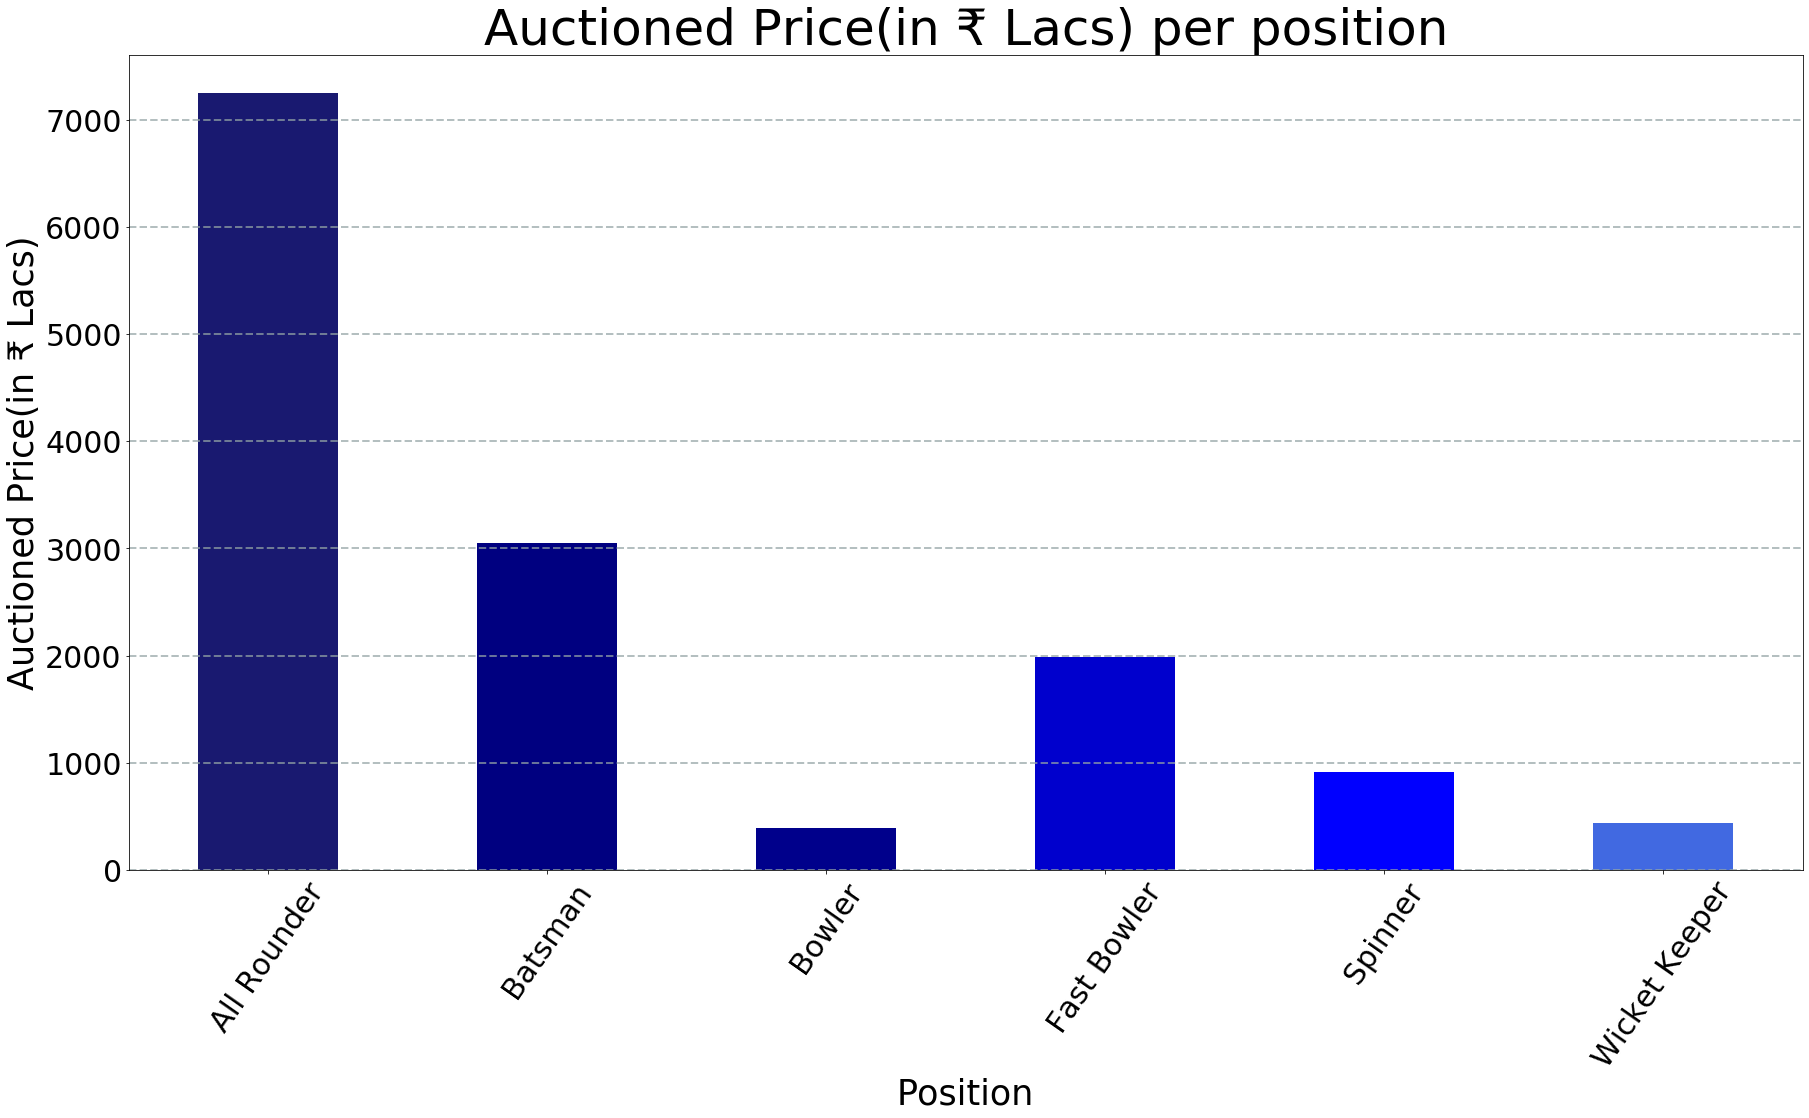

In [92]:
aradf['Auctioned Price(in ₹ Lacs)'].plot(kind = 'bar',color = ['midnightblue','navy','darkblue',
                                                              'mediumblue','blue','royalblue'])
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(fontsize =30,rotation = 55)
plt.yticks(fontsize = 30)
plt.xlabel("Position",fontsize = 35,rotation = 0)
plt.ylabel("Auctioned Price(in ₹ Lacs)",fontsize = 35)
plt.title("Auctioned Price(in ₹ Lacs) per position",fontsize = 50)
print(aradf['Auctioned Price(in ₹ Lacs)'])
plt.savefig("Auctioned Price(in ₹ Lacs) per position.pdf")

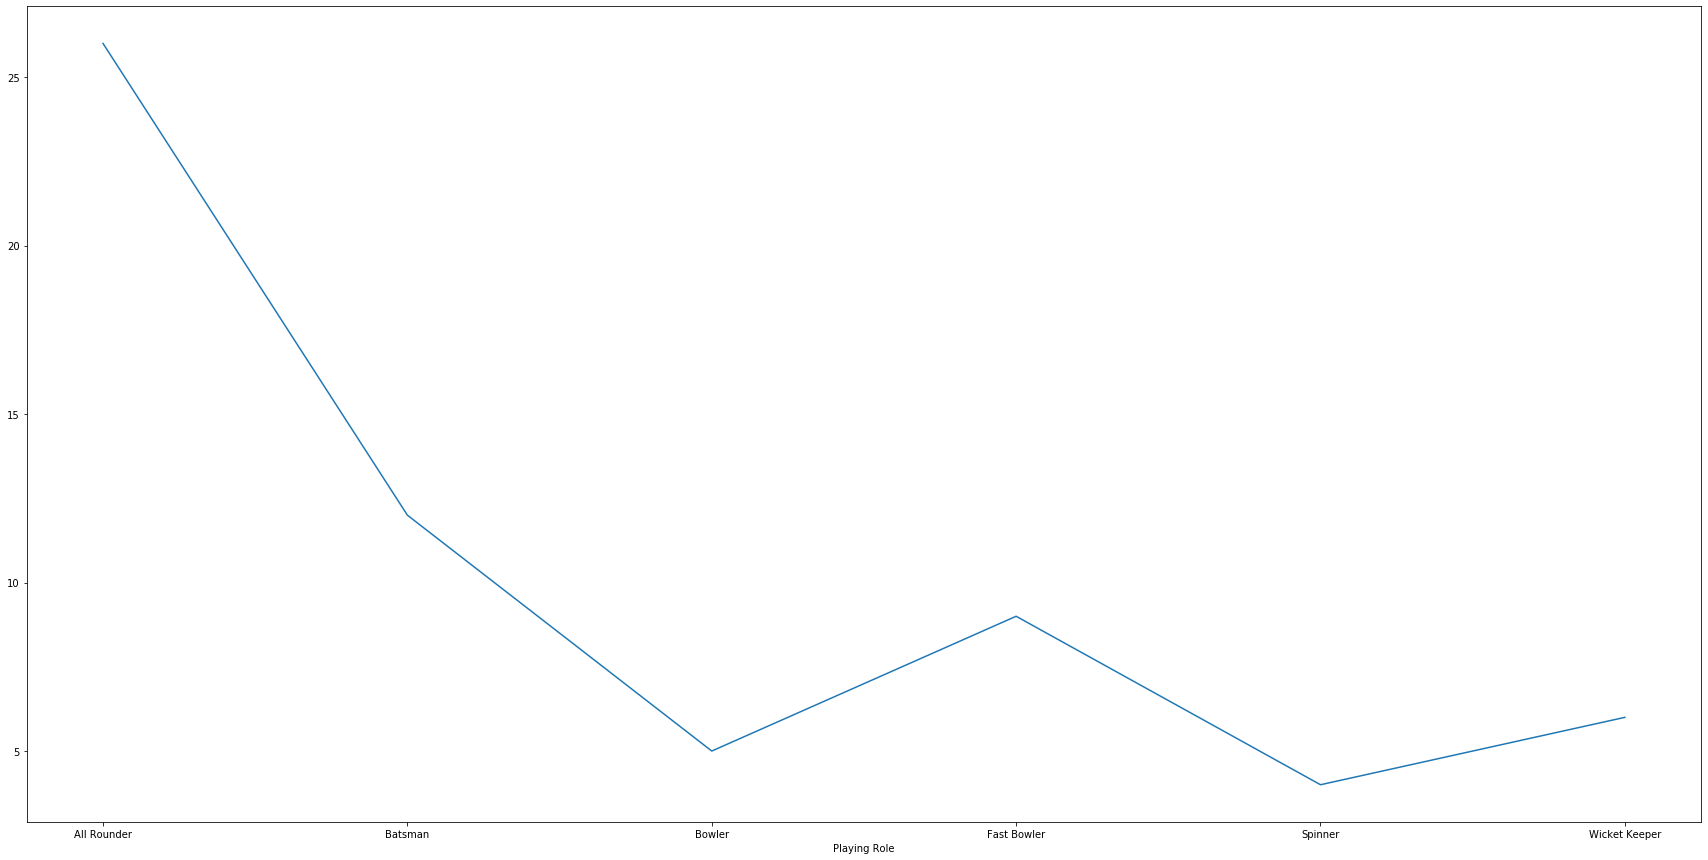

In [80]:
aradf['Number of players'].plot()

In [77]:
bdf = df[df['Playing Role']=='Wicket Keeper']
bdf

,S.No,Set No,Set,Name,Country,Playing Role,IPL Matches,Capped / Uncapped /Associate,Reserve Price(in ₹ Lacs),IPL 2020 Team,Auctioned Price(in ₹ Lacs),IPL 2019 Team,IPL Team(s),Increase from R to A
10,11,3,WK1,Alex Carey,NaN,Wicket Keeper,0.0,Capped,50,Delhi Capitals,240,No Team,NaN,190
21,22,8,UWK1,Anuj Rawat,NaN,Wicket Keeper,0.0,Uncapped,20,Rajasthan Royals,80,No Team,NaN,60
35,36,16,UWK2,Josh Philippe,NaN,Wicket Keeper,0.0,Uncapped,20,Royal Challengers Bangalore,20,No Team,NaN,0
51,52,[REC],[REC],Prab Simran Singh,NaN,Wicket Keeper,1.0,Uncapped,20,Kings XI Punjab,55,KXIP,KXIP,35
58,59,[REC],[REC],Shahbaz Ahmed,NaN,Wicket Keeper,0.0,Uncapped,20,Royal Challengers Bangalore,20,No Team,NaN,0
59,60,[REC],[REC],Nikhil Naik,NaN,Wicket Keeper,3.0,Uncapped,20,Kolkata Knight Riders,20,KKR,"KKR,KXIP",0


In [73]:
bdf['Auctioned Price(in ₹ Lacs)'].max()

775

In [64]:
bdf['IPL 2020 Team'].value_counts()

Kolkata Knight Riders          3
Delhi Capitals                 2
Sunrisers Hyderabad            2
Rajasthan Royals               2
Mumbai Indians                 2
Royal Challengers Bangalore    1
Name: IPL 2020 Team, dtype: int64

In [66]:
bwdf = df[df['Playing Role']=='Bowler']
bwdf['IPL 2020 Team'].value_counts()

Delhi Capitals                 2
Chennai Super Kings            1
Rajasthan Royals               1
Royal Challengers Bangalore    1
Name: IPL 2020 Team, dtype: int64

In [72]:
bwdf = df[df['Playing Role']=='Spinner']
bwdf

,S.No,Set No,Set,Name,Country,Playing Role,IPL Matches,Capped / Uncapped /Associate,Reserve Price(in ₹ Lacs),IPL 2020 Team,Auctioned Price(in ₹ Lacs),IPL 2019 Team,IPL Team(s),Increase from R to A
14,15,5,SP1,Piyush Chawla,NaN,Spinner,157.0,Capped,100,Chennai Super Kings,675,KKR,"KXIP,KKR",575
25,26,10,USP1,M Siddharth,NaN,Spinner,0.0,Uncapped,20,Kolkata Knight Riders,20,No Team,NaN,0
26,27,10,USP1,Ravi Bishnoi,NaN,Spinner,0.0,Uncapped,20,Kings XI Punjab,200,No Team,NaN,180
42,43,28,USP3,Pravin Tambe,NaN,Spinner,33.0,Capped,20,Kolkata Knight Riders,20,No Team,"RR,GL,SRH",0
